In [1]:
lumi = 100 #pb^-1

# Imports

In [2]:
from __future__ import print_function

import h5py, os, sys, glob, datetime, time
sys.path.append('../lib')
from glob import glob
import numpy as np

from scipy.special import erf
import scipy as sp
from scipy import interpolate

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
from matplotlib.colors import LogNorm

from prettytable import PrettyTable

dnd = []

# Get the data

In [3]:
sample_label = {'qcd':r'QCD',
                'AtoZZZ':r'$A\to ZZZ$',
                'GtoWW':r'$G\to WW$',
                'GtoBtt':r'$G_{B}\to t\bar{t}$',
                'GtoNtt':r'$G_{N}\to t\bar{t}$'
               }

BSM_samples = ['AtoZZZ', 'GtoWW', 'GtoBtt', 'GtoNtt']

In [4]:
indir = '../data/ModelIndepAnalysis/'

dic_p_val = {}

for n in BSM_samples:
    dic_p_val[n] = []
    for fname in glob(indir+'pVal_'+n+'*_L{:.1f}pb-1_wEff.npy'.format(lumi)):
        a = np.load(fname)
        dic_p_val[n].append(list(a[1:]))
    
    dic_p_val[n] = np.array(dic_p_val[n])
    i_s = np.argsort(dic_p_val[n][:,0])
    dic_p_val[n] = dic_p_val[n][i_s]

# Make the p-value plot

In [5]:
sample_col = {
              'AtoZZZ':'r',
              'GtoWW':'b',
              'GtoBtt':'g',
              'GtoNtt':'c'
             }

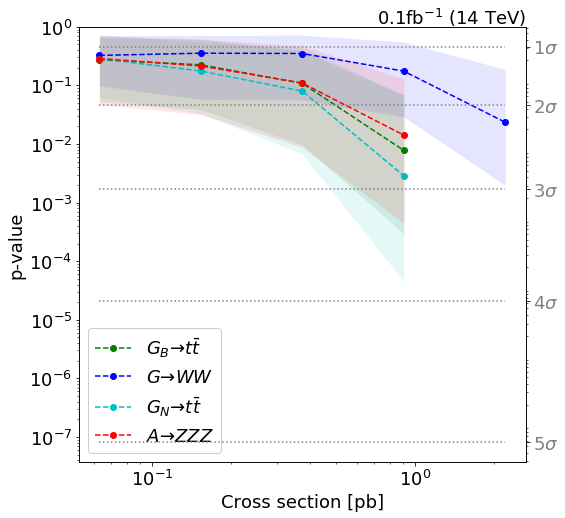

In [6]:
matplotlib.rcParams.update({'font.size': 18})
fig, ax1 = plt.subplots(figsize=(8,8))

max_xsec = 0
min_xsec = 1e10

for n, val_aux in dic_p_val.iteritems():
    val_aux = np.array(val_aux)
    x_sec = val_aux[:, 0]
    min_xsec = min(min_xsec, x_sec[0])
    max_xsec = max(max_xsec, x_sec[-1])
    
    quant = val_aux[:, 1:]
    
    ax1.plot(x_sec, quant[:, 2], 'o--', color=sample_col[n], label=sample_label[n])
    ax1.fill_between(x_sec, quant[:, 1], quant[:, 3], color=sample_col[n], alpha = 0.1, lw=0)
#     ax1.fill_between(x_sec, quant[:, 0], quant[:, 4], color=sample_col[n], alpha = 0.05, lw=0)
    
    
plt.xscale('log')
plt.xlabel('Cross section [pb]')
plt.yscale('log')
plt.ylabel('p-value')
plt.ylim(1 - erf(5.5/np.sqrt(2)), 1)
leg = plt.legend(loc='best', fancybox=True, framealpha=1.)
plt.text(1.2*max_xsec, 1.1, 
         '{:.1f}fb$^{{-1}}$ (14 TeV)'.format(1e-3*lumi), 
         ha='right')


ax2 = ax1.twinx()
for i in range(1, 6):
    p = 1 - erf(i/np.sqrt(2))
    ax2.plot([min_xsec, max_xsec], 2*[p], ':', color='grey')
plt.yscale('log')
ax2.set_yticks(1 - erf(np.arange(1,6)/np.sqrt(2)))
ax2.set_yticklabels(['{}$\sigma$'.format(i) for i in range(1,6)])
ax2.tick_params(axis='y', labelcolor='grey')

fig.savefig('../fig/ModelIndependentAnalysis/' + 'pValueScan_L' + str(lumi) + 'pb-1_fromJobs.png', bbox_inches='tight')